In [39]:
dataset = 'Dataset/penguins.csv'

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv(dataset)
data.drop(columns=data.columns[-1])

print(data.head())
print(data.columns)


   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [41]:
data.drop(columns='year', axis=1)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
last_col = data[['sex']]

last_col_enc = ohe.fit_transform(data[['sex']])

enc_df = pd.DataFrame(last_col_enc, columns=ohe.get_feature_names_out(['sex']))

data = data.drop(columns=data.columns[-1])
data = pd.concat([data, enc_df], axis=1)

print(data.head)

<bound method NDFrame.head of      rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
3        4     Adelie  Torgersen             NaN            NaN   
4        5     Adelie  Torgersen            36.7           19.3   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  sex_female  sex_male  sex_nan  
0                181.0       3750.0    male         0.0       1.0      0.0  
1          

In [51]:
data = data.drop(columns=['species', 'island', 'sex', 'sex_nan']).dropna()

In [53]:
kmeans = KMeans(n_clusters=4, random_state=21)

cluster = kmeans.fit_predict(data)

In [54]:
data = data.dropna()

data['cluster'] = cluster

In [55]:
import matplotlib.pyplot as plt

In [62]:
pca = PCA(n_components=2)

fin = pca.fit_transform(data)
components = pca.components_
print(components)


[[ 3.22550039e-02  4.01736537e-03 -1.15491996e-03  1.52012017e-02
   9.99355179e-01 -2.63845177e-04  2.63845177e-04 -3.91143127e-04]
 [ 9.98284026e-01  3.62034842e-02 -2.63379795e-03  3.21073620e-02
  -3.28572959e-02  5.64355433e-04 -5.64355433e-04 -5.02479152e-04]]


<function matplotlib.pyplot.show(close=None, block=None)>

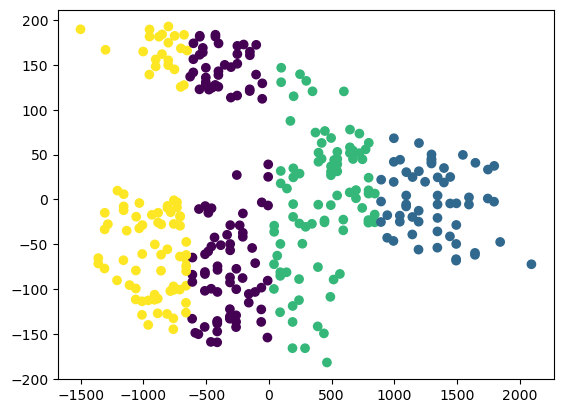

In [66]:
plt.scatter(fin[:, 0], fin[:, 1], c=data['cluster'])
plt.show